# Combining Dataframes

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = [['Bart', 15], ['Lisa', 10]]
df1 = pd.DataFrame(data, columns = ['Name', 'Age'])
data = [['Marge', 40], ['Homer', 45]]
df2 = pd.DataFrame(data, columns = ['Name', 'Age'])

pd.concat([df1, df2])

,Name,Age
0,Bart,15
1,Lisa,10
0,Marge,40
1,Homer,45


# Types of joins
- Inner Join
- Left Join
- Right Join
- Outer Join

In [50]:
joined_df = df1.join(df2, how='inner', lsuffix = '_left', rsuffix = '_right')
# joined_df = pd.concat([df1, df2], join = 'inner', axis = 1)
joined_df

,Name_left,Age_left,Name_right,Age_right
0,Bart,15,Marge,40
1,Lisa,10,Homer,45


# Access SQL DB

In [100]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///../Data/database.sqlite')
cards_df = pd.read_sql_table('cards', engine)
# cards_df.set_index('card_id', inplace = True)
cards_df.head()

,card_id,player_class,type,name,set,text,cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,0.0,NaN,NaN,None,NaN,None,None,None,None,None,None,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,None,3.0,2.0,5.0,COMMON,NaN,None,BEAST,None,None,None,None,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,1.0,It's like putting racing stripes and a giant s...,None,None,None,None,None,NaN
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,None,10.0,10.0,10.0,COMMON,1.0,"Rejected names: Forty-Foot Faceless, Big ol' N...",None,None,None,None,None,NaN


# Pivot Tables with Pandas
- Wide Format
- Long Format: good for time series / agregated data. We can use Multi-Hierarchical Indexing

In [101]:
df = pd.read_csv('../Data/causes_of_death.tsv', sep='\t')
grouped = df.groupby(['State', 'Gender'])['Deaths', 'Population'].agg(['mean', 'min', 'max', 'std'])
grouped.head()

Deaths                          
                        mean min     max           std
State   Gender                                        
Alabama Female  10753.325000  10  116297  24612.250487
        Male    10503.585366  10   88930  20620.218089
Alaska  Female    679.975000  13    4727   1154.870455
        Male      860.357143  12    5185   1411.777392
Arizona Female   8800.622222  21  133923  25979.871632

In [82]:
grouped = grouped.reset_index()
cols0 = grouped.columns.get_level_values(0)
cols1 = grouped.columns.get_level_values(1)
grouped.columns = [col0 + '_' + col1 if col1 != '' else col0 for col0, col1 in list(zip(cols0, cols1))]
pivot = grouped.pivot(index='State', columns='Gender', values='Deaths_mean')

Gender,Female,Male
State,,
Alabama,10753.325000,10503.585366
Alaska,679.975000,860.357143
Arizona,8800.622222,9405.659574
Arkansas,6621.615385,6301.690476
California,45233.297872,46406.297872


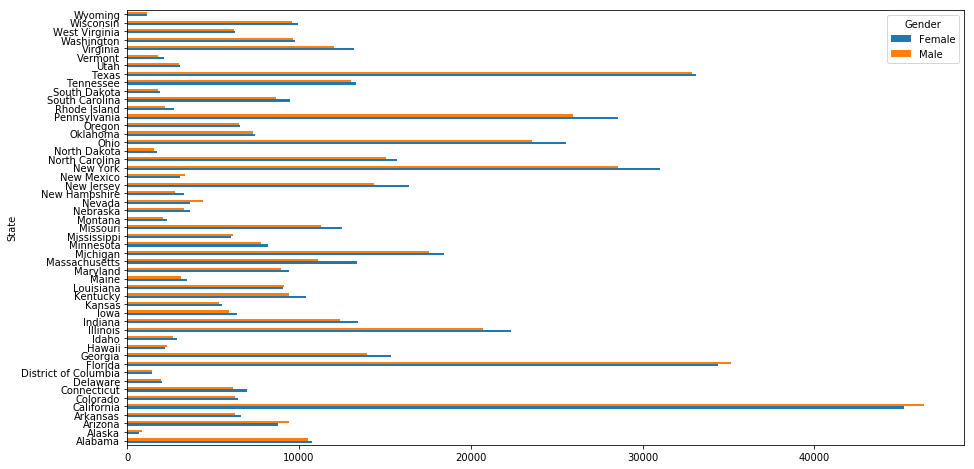

In [87]:
display(pivot.head())
pivot.plot(kind='barh', figsize=(15, 8))

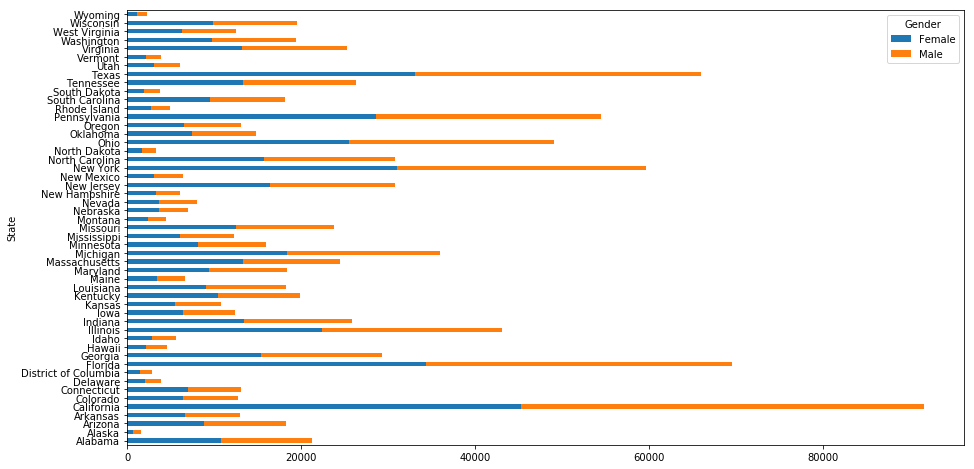

In [89]:
pivot.plot(kind='barh', figsize=(15, 8), stacked=True)

# Data Cleansing
## Dealing with Missing Data
Strategies:
- Remove Data (Rows / Columns): **.dropna()**
- Replace
  - Continuous Data: Best to replace with the median: **.fillna()**
  - Categorical Data: Most common value?
- Keep
  - Continuous Data: **Coarse Classification (Binning)** Separate by categories (i.e. age range) and create a new category
  - Categorical Data: Replace with a string 'NaN' / 'missing'

In [113]:
df = pd.read_csv('../Data/train.csv')
display(df.head())
display(df.isna().sum())
# display(df.Cabin.value_counts())
display(df.Pclass.unique()) # to detect placeholder values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([3, 1, 2], dtype=int64)